<a href="https://colab.research.google.com/github/HanSeoulOh/mathproblems/blob/master/privacyMath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Privacy Techniques

The purpose of this notebook is to analyze the performance of various privacy techniques.

##### Helpers

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

### Naive Dataset 1

We will generate a naive dataset that consists of rows of tuples in the following format: $(id_1, id_2, amt, des)$

Where: 
- $id_1$ is the sender
- $id_2$ is the receiver
- $amt$ is the amount transferred
- $des$ is a description

For purposes of simplicity we will start with $amt = 1$ and $des$ being a random real number from $\mathbb{R}^{[0,1]}$; $id_1, id_2 \in \mathbb{Z}$


array([[491, 790, 468, 850, 584, 875, 173, 193, 432, 955, 331, 914, 825,
        707, 201, 141, 328, 239, 747,  95, 618, 570, 882, 203, 209, 521,
        824, 128, 662, 268, 167, 803, 596, 650, 256, 683, 395, 782, 484,
        245, 734, 387, 486, 424, 543, 119, 436,  60, 447,   4, 876, 889,
        619, 375, 559, 464, 497, 121, 362,  43,   9, 851, 584,  62, 649,
        314, 144, 834, 889, 101, 685, 483,   0, 237, 233, 350, 833, 455,
        308, 233, 216,  74, 230, 281, 923, 737, 198, 131, 570, 198, 603,
        497,  49, 385, 208, 641, 363,  49, 641, 930],
       [302, 710, 349, 389, 232,   7, 128, 349, 474, 705, 665, 809, 876,
        791, 250, 253, 322, 219, 379, 721, 124, 396, 617, 855, 893, 116,
        767, 355, 665, 176, 138, 335, 799, 315, 147, 688, 801, 382, 574,
        398, 334, 184, 405, 990, 137, 571, 202, 146, 666,  91, 180, 870,
         15, 149, 560, 499, 865, 613, 674, 607, 606,  78, 188, 678, 820,
        222, 218, 949, 780, 271, 344, 431, 535, 535, 815, 968, 409, 78

In [0]:
class naiveDataSet:
  def __init__(self, population = 10, tx = 30):
    self.data = pd.DataFrame(data = np.array([np.random.randint(population, size=tx), np.random.randint(population, size=tx), np.ones(tx), np.random.rand(tx)]).T, columns = ['sender', 'receiver', 'amount', 'description'])

Visualizing generated dataset

In [88]:
nds = naiveDataSet()
nds.data

,sender,receiver,amount,description
0,7.0,5.0,1.0,0.110527
1,0.0,5.0,1.0,0.172230
2,9.0,1.0,1.0,0.775788
3,9.0,3.0,1.0,0.399450
4,2.0,5.0,1.0,0.321827
5,3.0,2.0,1.0,0.192682
6,6.0,2.0,1.0,0.607794
7,6.0,8.0,1.0,0.020210
8,1.0,5.0,1.0,0.606827
9,2.0,1.0,1.0,0.791258


In [89]:
nds.data.groupby(['sender']).sum().mean()

receiver       11.700000
amount          3.000000
description     1.260029
dtype: float64

### Differential Privacy


The fundamental equation of differential privacy is given as: $\Pr [\mathcal{K}(D) \in S] \le e^\epsilon \times \Pr [ \mathcal{K} (D') \in S]$

In plain English, 

##### Useful References


- https://en.wikipedia.org/wiki/Differential_privacy
- https://en.wikipedia.org/wiki/Reconstruction_attack


In [90]:
df = nds.data[['sender', 'amount']]
idx = df.sample(n = int(len(df) / 2)).sort_index().index

df.loc[idx, 'amount'] = 10
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sender,amount
0,7.0,1.0
1,0.0,10.0
2,9.0,10.0
3,9.0,10.0
4,2.0,10.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5039005f8>]],
      dtype=object)

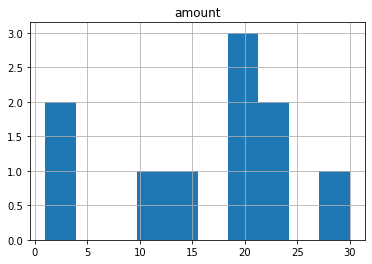

In [91]:
df.groupby('sender').sum().hist()

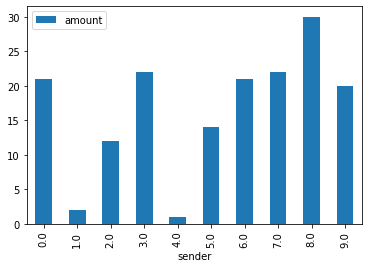

In [92]:
df.groupby('sender').sum().plot.bar()

In [97]:
df.mean()

sender    4.566667
amount    5.500000
dtype: float64

#### Randomized Response Mechanism

In [0]:

ndf = df.sort_index()
idx = ndf.sample(n = int(len(ndf) / 2)).sort_index().index

def randResponse(a, p):
  if np.random.rand() < p:
    if np.random.rand() < 0.5:
      return 1
    else:
      return 10
  else:
    return a

ndf.loc[idx, 'amount']= ndf.loc[idx, 'amount'].apply(lambda x: randResponse(x, 0.1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd502c43390>]],
      dtype=object)

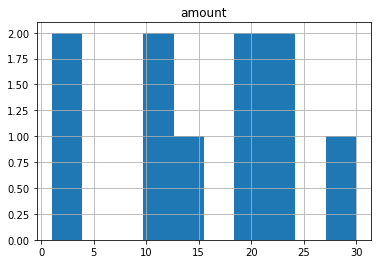

In [100]:
ndf.groupby('sender').sum().hist()

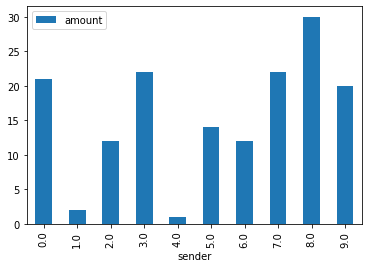

In [101]:
ndf.groupby('sender').sum().plot.bar()

In [102]:
ndf.mean()

sender    4.566667
amount    5.200000
dtype: float64

### Homomorphic Encryption

### [Paillier Cryptosystem](https://en.wikipedia.org/wiki/Paillier_cryptosystem)

In [0]:
%%bash
git clone https://github.com/n1analytics/python-paillier

Cloning into 'python-paillier'...


In [0]:
%%bash
python python-paillier/setup.py

/usr/local/lib/python3.6/dist-packages/setuptools/dist.py:475: UserWarning: Normalizing '1.4.1-dev0' to '1.4.1.dev0'
  normalized_version,
usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
   or: setup.py --help [cmd1 cmd2 ...]
   or: setup.py --help-commands
   or: setup.py cmd --help

error: no commands supplied
